In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
# torchvision is a python library that complements pytorch/torch with functionality related to 
# computer vision (to images) in torchvision.datasets we can find toy datasets containing images
from torchvision.datasets import FashionMNIST
# in torchvision.transforms we find transforms: these take in an image and does something to it
# there are transforms that rotate images, transforms that crop images etc.
# these are useful as a way to increase the size of our dataset: it is usually good for the model to see as much data as possible
# we will make use of ToTensor(), which converts PIL (Python Image Library) images to a format that pytorch understands (a tensor)
from torchvision.transforms import ToTensor

In [4]:
# load the training dataset of FashionMNIST
# this dataset contains 60000 images, and for each one of them, the index of a class
# (you can find the order of the classes in the presentation / notebook)
# notice we pass transform = ToTensor()
mnist_train_dataset = FashionMNIST(root = "/data", train = True, transform = ToTensor(), download = True)

In [6]:
# each example contains 2 things: an image (analogous to the population in the first part, aka the input)
# and a class (analogous to the profit in the first part, aka the output)
mnist_train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

9

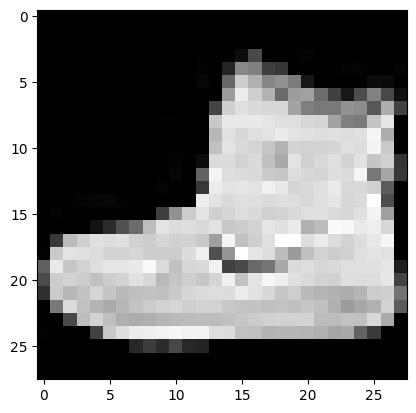

In [13]:
# we can matplotlib to display an image
# mnist_train_dataset[0] contains the image and class, so we need mnist_train_dataset[0][0] to get the image
# the image has shape 1 x 28 x 28: this represents a grayscale image in PyTorch (as in, not a color image)
# if it were a color image, it would have had the shape 3 x 28 x 28, because we would have needed a red value, a green value and a blue value
# since computers usually represent color as a mix of red, green and blue
# matplotlib accepts tensors as input, but doesn't like the extra axis (dimension) of size 1
# which is why we need to index one extra time into the array, leaving us with a 28 x 28 image
# matplotlib requires cmap = "gray" to plot the image as a grayscale image
# printing the class, we notice it has the value 9, which, by consulting the table from the presentation
# we can see refers to an ankle boot, which the image seems to showcase
import matplotlib.pyplot as plt
plt.imshow(mnist_train_dataset[0][0][0], cmap = "gray")
mnist_train_dataset[0][1]

In [14]:
# this is the test dataset and has the same format as the train dataset
# we use the test dataset only after we have trained the model
# never ever ever train a model on the test dataset :)
# the point of the test dataset is to distinguish between a model that has only managed to memorize the training dataset
# (such a model can be found at the beginning of the presentation)
# and a model that has managed to learn something from the dataset, and will be able to produce good outputs for inputs that
# it hasn't already seen
mnist_test_dataset = FashionMNIST(root = "/data", train = False, transform = ToTensor(), download = True)

In [15]:
len(mnist_train_dataset)

60000

In [16]:
len(mnist_test_dataset)

10000

In [17]:
# torchvision.datasets.FashionMNIST produces pytorch datasets (meaning instances of the torch.utils.data.Dataset class)
# so we can pass them to a DataLoader
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size = 10)
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size = 10)

In [18]:
# we want to use a model that looks like y = a1*x1+a2*x2+...an*xn+b on the image
# just like we did for the population - profit dataset
# this requires that we have a list of input features
# but what we have at the moment is a matrix of input features
# (since our image is represented as a matrix of pixels)
# to deal with that, we take all the lines in the matrix of pixels
# and place them next to each other, forming a long vector of pixels
# nn.Flatten() implements this functionality
flatten_layer = nn.Flatten()

In [20]:
flattened_images = flatten_layer(torch.rand((1, 28, 28)))

In [21]:
flattened_images.shape

torch.Size([1, 784])

In [22]:
28*28

784

In [27]:
# with the flatten layer we got our hands on a vector of 784 elements
# since our dataset has 10 classes, we need a model that outputs 10 values
# which is why we pass 784 and 10 to nn.Linear
# EXTRAish note: since we have 784 input features, and we are doing linear regression
# we will end up with 784 parameters 
# however, we are not doing only one linear regression, we are doing 10 of them: one for each of the 10 outputs of the model
# this new model has (ignoring the bias terms) 784 * 10 parameters
# it sounds convenient to store these parameters in a matrix: the first line contains the 784 parameters for the first linear regression
# and so on until the last line (row) which contains the 784 parameters for the 10th linear regression
# we would end up with a 10 x 784 matrix (as we can see in the .weight attribute in the following cell)
linear_regression_layer = nn.Linear(784, 10)

In [26]:
# placing the parameters of the model in the shape of a matrix is not only convenient
# you might remember that in matrix multiplication we take each row of the left matrix
# and "operate" it with each columns of the right matrix
# now if the first row is equal to a1, a2, ... a784 (our parameters)
# and the first column is our flattened image vector p1, p2, ..., p784
# that "operate" would lead us to a1*p1+a2*p2+...+a784*p784
# by this logic we can see that (ignoring the bias term once again)
# the output of nn.Linear(784, 10) will be equal to A*x.T
# here, A is the matrix of parameters that we discusses above
# and x.T is a matrix made out of a single column containing the model's inputs
linear_regression_layer.weight.shape

torch.Size([10, 784])

In the following 2 cells we are first using the nn.Linear(784, 10) layer, and then computing its output manually by essentially A @ x.T + bias.T. As a challenge you can try to figure out how everything works (Why do we need .float(), why do we need .reshape(-1, 1) etc.).

In [33]:
linear_regression_layer(torch.arange(784).reshape(1, 784).float())

tensor([[  39.0755, -291.0217,  253.0401, -325.7418,  -80.6837,  289.0842,
          141.4518, -162.6425,  254.1929,  -68.1710]],
       grad_fn=<AddmmBackward0>)

In [43]:
linear_regression_layer.weight.data @ (torch.arange(784).reshape(1, 784).float().T) + linear_regression_layer.bias.data.reshape(-1, 1)

tensor([[  39.0755],
        [-291.0217],
        [ 253.0401],
        [-325.7418],
        [ -80.6837],
        [ 289.0842],
        [ 141.4518],
        [-162.6425],
        [ 254.1929],
        [ -68.1710]])

In [44]:
# at this point we have done 2 things to the input image: flattened it, and passed it through a linear layer
# we can express that in PyTorch using nn.Sequential: this layer will run its input through all of its components:
# first through nn.Flatten(), and then through nn.Linear()
model = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 10))

In [45]:
nn.Flatten()(torch.ones(10, 28, 28)).shape

torch.Size([10, 784])

In [47]:
# looking at this input, we might wonder just what could it possibly means
# for problems where we want to classify something as belonging to a class or another
# (in our situation, images as containing a t-shirt, or a shirt, or trousers etc)
# we will look at the output and figure out the position of the highest value
# in our case, 0.5697 is the greatest value, and it is the 8th in the result
# so our model has classified the image we gave it as having an ankle boot in it
model(torch.ones((1, 28, 28)))

tensor([[-0.8377, -0.1291,  0.4051, -0.5426, -0.1941,  0.1692,  0.0970,  0.5697,
          0.0627,  0.5365]], grad_fn=<AddmmBackward0>)

In [53]:
# now that we have a model, we will also need a loss function
# for classification problems, the most used loss function is the cross entropy loss
# the cross entropy loss first transforms the model's outputs to probabilities by using
# the softmax function: this function takes in any numbers, and produces new numbers
# that add up to 1, and that are positive (as a result of being positive and adding up to 1, they are also <= 1)
# for numbers a, b, c the softmax function will output numbers e^a/(e^a+e^b+e^c), e^b/(e^a+e^b+e^c) and e^c/(e^a+e^b+e^c)
# EXTRA: convince yourself those numbers are positive and add up to 1
# In the previous cell, we took the largest value in the model's output and went with it
# If we were to apply softmax, the largest value in the model's output would have still remained the largest value
# However now we are also looking at the rest: we are doing a comparison between the largest value and the rest
# To see that, notice that in the formula we are dividing (e^c) by (e^a+e^b+e^c), so we are comparing that value, e^c
# to the rest of the values, e^a+e^b+e^c
# CrossEntropyLoss than looks at what the correct value would have been, extracts the probability that correspond to it
# and penalizes the model according to the formula -ln(p)
# so if the model gave a probability of 1 for the correct class, than it would have received a penalty of -ln(1)=0, a.k.a no penalty
# on the other hand, if the model gave a probability of 0 to the correct class, it would have been drastically penalized, by -ln(0),
# which evaluates to infinity (as a limit, but as far as we're concerned the penalty would be extremely large)
loss_function = nn.CrossEntropyLoss()

In [54]:
# to evaluate the cross entropy loss, we need to pass the model's outputs, and the correct class
# for this example, PyTorch first applies Softmax, turning the value from 1, 2, 5 to
# e^1/(e^1+e^2+e^5), e^2/(e^1+e^2+e^5), e^5/(e^1+e^2+e^5)
# these end up equal to ~0.017, ~0.046 and ~0.93
# we told the loss function that the correct class is class at index 1
# so it applies a penalty of -ln(0.046)~3.07
loss_function(torch.Tensor([[1., 2., 5.]]), torch.LongTensor([1]))

tensor(3.0659)

The code below manually computes cross entropy loss for the same inputs as the nn.CrossEntropyLoss function received above:

In [64]:
denominator = torch.exp(torch.Tensor([1., 2., 5.])).sum()
denominator

tensor(158.5205)

In [65]:
probability_for_class_1 = torch.exp(torch.Tensor([2])) / denominator
probability_for_class_1

tensor([0.0466])

In [63]:
penalty = -torch.log(probability_for_class_1)
penalty

tensor([3.0659])

In [66]:
# SGD optimizer, same as before
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [67]:
for epoch in range(10):
    for pixels_batch, classes_batch in mnist_train_loader:
        predicted_probabilities = model(pixels_batch)
        loss = loss_function(predicted_probabilities, classes_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [69]:
# remember we should test on the test dataset, and not the train dataset
# we can obviously pass an image from the training dataset through the model
# but that may not reflect too accurately how good the model actually is
test_image, real_class = mnist_test_dataset[0]

In [76]:
# pass the image through the model
# Note: the trained model is nowhere near perfect, meaning it will misclasify images
# If you retrain, due to starting from different initial values for the weight and bias
# you may end up with a model that misclasifies the image that we're testing it with now 
model_output = model(test_image)

In [77]:
model_output

tensor([[-8.4316, -9.2156, -2.6557, -3.8496, -6.5907,  8.0516, -2.2205,  7.6194,
          6.6764, 10.7622]], grad_fn=<AddmmBackward0>)

In [78]:
# torch.argmax returns the position of the largest value in model_output
# in our case, that is the final position (10th position, 9 because we start counting at 0)
predicted_class = torch.argmax(model_output)

In [73]:
predicted_class

tensor(9)

Above we can see that the last value in the output tensor is bigger than the rest, so we take that value to be the class that the model predicted. The legend in the presentation tells us that it corresponds to an ankle boot. Let's plot the image and see if that's really the case.

In [74]:
from matplotlib import pyplot as plt

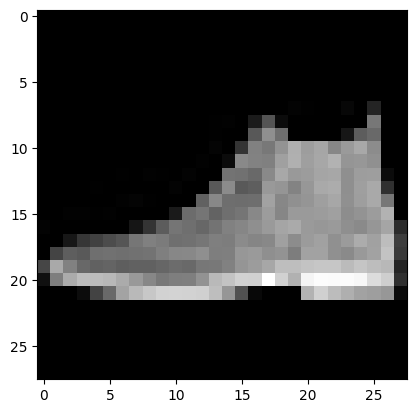

In [75]:
plt.imshow(test_image[0], cmap = "gray")